# FMCW雷达回波信号建模  

FMCW（Frequency Modulated Continuous Wave，线性调频连续波）雷达是广泛用于测量目标距离、速度和角度的雷达类型。下面是FMCW雷达回波信号的建模过程，包括距离、速度和角度信息的描述。  

## 1. 基本原理  
FMCW雷达通过发射一段频率线性调制的连续波信号，并接收目标反射回的回波信号，通过比对发射信号和接收信号的频率差（即拍频），来测量目标的距离、速度和角度。  

## 2. 发射信号  
设发射信号为线性调频（chirp）信号，用数学表示为：  
$$  
 S_T(t) = A \cos \left(2 \pi \left(f_c t + \frac{B}{2T} t^2 \right)\right)   
$$  
其中：  
- $ A $ 是信号幅度  
- $ f_c $ 是载波频率  
- $ B $ 是带宽  
- $ T $ 是调频周期  
- $ t $ 是时间  

## 3. 距离信息  
目标距离 $ R $ 对应的回波信号会有一个时延 $ \tau = \frac{2R}{c} $ （其中 $ c $ 为光速）。因此，接收信号为：  
$$  
 S_R(t) = A \cos \left(2 \pi \left(f_c (t - \tau) + \frac{B}{2T} (t - \tau)^2 \right)\right)   
$$  

将接收信号与发射信号进行混频（乘法）并低通滤波，得到拍频信号：  
$$  
 f_{\text{beat}} = \frac{B \tau}{T}   
$$  
这样可以得到距离信息：  
$$  
 R = \frac{c T f_{\text{beat}}}{2B}   
$$  

## 4. 速度信息  
目标相对速度 $ v $ 会引起多普勒频移 $ f_D $，导致接收信号频率偏移。同时考虑速度时，回波信号为：  
$$  
 S_R(t) = A \cos \left(2 \pi \left(f_c (t - \tau) + f_D t + \frac{B}{2T} (t - \tau)^2 \right)\right)   
$$  

此时拍频信号为：  
$$  
 f_{\text{beat}} = \frac{B \tau}{T} + f_D   
$$  
通过解调得到多普勒频移 $ f_D $，进而通过多普勒效应公式获取速度信息：  
$$  
 v = \frac{f_D \lambda}{2}   
$$  
其中 $ \lambda = \frac{c}{f_c} $。  

## 5. 角度信息  
角度信息通常通过天线阵列和波束成形技术来获取。假设雷达使用一个均匀线性阵列（ULA）天线，通过相位差估计角度。  

设天线阵列有 $ N $ 个天线元件，间距为 $ d $。来自某一方向 $ \theta $ 的目标信号在第 $ i $ 个天线元件的相位延迟为：  
$$  
 \Delta \phi_i = 2 \pi \frac{d}{\lambda} i \sin(\theta)   
$$  

通过测量各天线元件接收到的信号的相位差并结合波束成形技术，可以估计入射角度 $ \theta $。  

## 6. 综合考虑  
综合距离、速度、角度信息，FMCW雷达的回波信号可以表示为：  
$$  
 S_R(t) = A \cos \left(2 \pi \left(f_c (t - \tau) + f_D t + \frac{B}{2T} (t - \tau)^2 \right) + \Delta \phi_i \right)   
$$  

通过数字信号处理，包括混频、滤波、FFT（快速傅里叶变换）、波束成形等步骤，可以提取目标的距离、速度和角度信息。  

## 实际建模步骤  
1. **模拟发射信号**：生成线性调频信号 $ S_T(t) $。  
2. **模拟回波信号**：根据目标距离 $ R $、速度 $ v $ 和角度 $ \theta $，生成相应的回波信号 $S_R(t)$。  
3. **信号处理**：进行混频与低通滤波，提取拍频 $ f_{\text{beat}} $ 、多普勒频移 $ f_D $ 和相位差 $\Delta \phi_i\$。  
4. **距离和速度计算**：根据拍频 $f_{\text{beat}}$ 计算距离，根据多普勒频移 $ f_D $ 计算速度。  
5. **角度估计**：通过相位差和波束成形技术估计方向角度 $ \theta $。  

通过上述过程，可以准确提取目标的距离、速度和角度信息，实现FMCW雷达测量的基本功能。

(256,)


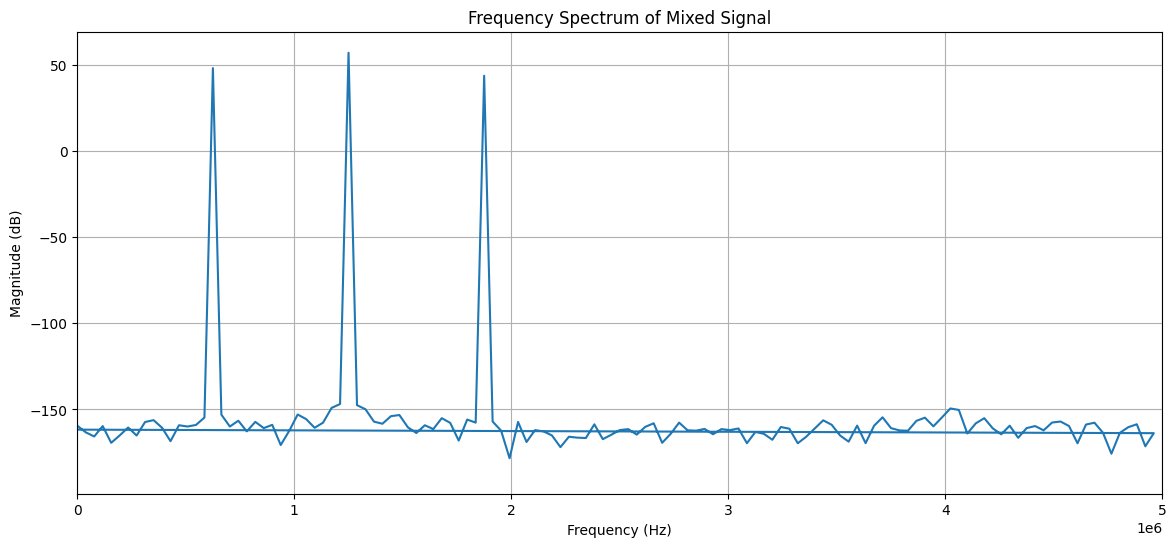

Estimated range to the strongest target: 20.00 meters


In [25]:
import numpy as np  
import matplotlib.pyplot as plt  

# Radar parameters  
fc = 24e9  # Center frequency (24 GHz)  
B = 240e6  # Bandwidth (240 MHz)  
fs = 10e6  # Sampling frequency (10 MHz)  
T = 256/fs  # Chirp duration (1 μs)  
c = 3e8    # Speed of light (3*10^8 m/s)  

# Time vector  
t = np.arange(0, T, 1/fs)  

# Chirp rate  
k = B / T  

# Function to generate FMCW chirp signal  
def generate_chirp(t, fc, k):  
    return np.exp(1j * 2 * np.pi * (fc * t + 0.5 * k * t**2))  

# Target parameters  
R = [10, 20, 30]  # Target distances (meters)  
v = [0, 0, 0]     # Target velocities (m/s), assume stationary for simplicity  
A = [1, 2.8, 0.6] # Amplitudes of reflected signals  

# Generate transmitted signal  
tx_signal = generate_chirp(t, fc, k)  

# Generate received signal  
rx_signal = np.zeros_like(tx_signal, dtype=complex)  
for i in range(len(R)):  
    # Time delay for each target  
    tau = 2 * R[i] / c  
    # Frequency shift due to Doppler effect (ignored here for simplicity)  
    # Doppler shift = 2 * v[i] / lambda, lambda = c / fc  
    # Frequency shift (ignored in this example)  
    # f_doppler = 2 * v[i] / (c / fc)  
   
    # Delayed and attenuated received signal  
    delayed_signal = A[i] * generate_chirp(t - tau, fc, k)  
    
    # Combine the received signals from all targets  
    rx_signal += delayed_signal  

# Mix received signal with transmitted signal (homodyne downconversion)  
mixed_signal = tx_signal * np.conj(rx_signal)  

print(mixed_signal.shape)

# Perform FFT to find beat frequencies  
fft_result = np.fft.fft(mixed_signal)  
frequencies = np.fft.fftfreq(len(mixed_signal), 1/fs) 

# Calculate range from beat frequencies  
beat_freq = np.abs(frequencies[np.argmax(np.abs(fft_result))])  
range_estimate = (c * T * beat_freq) / (2 * B)  

# # Plot results  
# plt.figure(figsize=(14, 6))  

# plt.subplot(2, 1, 1)  
# plt.plot(t * 1e6, np.real(tx_signal))  
# plt.title('Transmitted Signal (Real Part)')  
# plt.xlabel('Time (μs)')  
# plt.ylabel('Amplitude')  

# plt.subplot(2, 1, 2)  
# plt.plot(t * 1e6, np.real(rx_signal))  
# plt.title('Received Signal (Real Part)')  
# plt.xlabel('Time (μs)')  
# plt.ylabel('Amplitude')  

# plt.tight_layout()  
# plt.show()  

plt.figure(figsize=(14, 6))  
plt.plot(frequencies, 20 * np.log10(np.abs(fft_result)))  
plt.title('Frequency Spectrum of Mixed Signal')  
plt.xlabel('Frequency (Hz)')  
plt.ylabel('Magnitude (dB)')  
plt.xlim(0, fs/2)  
plt.grid()  
plt.show()  

print(f'Estimated range to the strongest target: {range_estimate:.2f} meters')

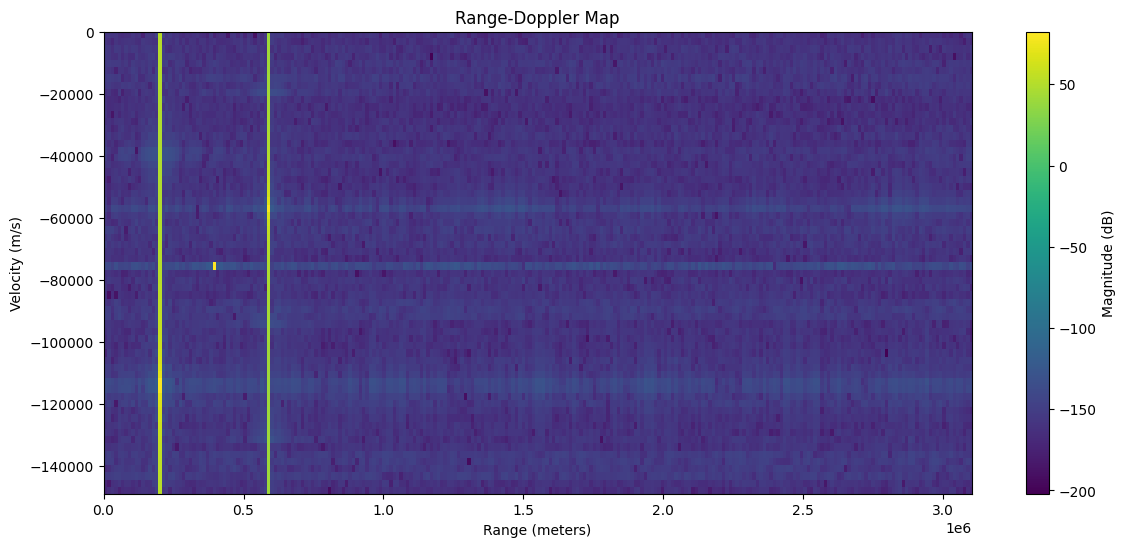

In [12]:
import numpy as np  
import matplotlib.pyplot as plt  

# Radar parameters  
fc = 24e9  # Center frequency (24 GHz)  
B = 240e6  # Bandwidth (240 MHz)  

fs = 10e6  # Sampling frequency (10 MHz)  
T = 256/fs  # Chirp duration (1 μs)  
c = 3e8    # Speed of light (3*10^8 m/s)  

# Number of chirps  
num_chirps = 64  

# Time vector for one chirp  
t = np.arange(0, T, 1 / fs)  

# Total time vector across all chirps  
t_total = np.arange(0, num_chirps * T, 1 / fs)  

# Chirp rate  
k = B / T  

# Function to generate FMCW chirp signal  
def generate_chirp(t, fc, k, phase):  
    return np.exp(1j * 2 * np.pi * (fc * t + 0.5 * k * t**2 + phase))  

# Target parameters  
R = [10, 20, 30]  # Target distances (meters)  
v = [-10, 0, 5]   # Target velocities (m/s)  
A = [1, 0.8, 0.6] # Amplitudes of reflected signals  

# Generate transmitted signals over all chirps  
tx_signals = np.array([generate_chirp(t, fc, k, 0) for _ in range(num_chirps)])  

# Generate received signals over all chirps  
rx_signals = np.zeros_like(tx_signals, dtype=complex)  

for i in range(len(R)):  
    for chirp_idx in range(num_chirps):  
        # Time delay for each target  
        tau = 2 * R[i] / c  
        # Phase shift due to velocity for current chirp  
        phase_shift = 2 * np.pi * fc * (2 * v[i] * chirp_idx * T) / c  
        # Generate delayed and phase-shifted chirp  
        delayed_signal = A[i] * generate_chirp(t - tau, fc, k, phase_shift)  
        # Accumulate signals for all chirps  
        rx_signals[chirp_idx] += delayed_signal  

# Mix received signals with transmitted signals  
mixed_signals = tx_signals * np.conj(rx_signals)  

# Reshape to form a range-Doppler matrix (num_chirps x num_samples)  
mixed_signals_reshaped = mixed_signals.reshape((num_chirps, -1))  

# Perform 2D FFT (Range FFT followed by Doppler FFT)  
range_doppler_map = np.fft.fft2(mixed_signals_reshaped, axes=(0, 1))  

# Get magnitude of the result  
range_doppler_map = np.fft.fftshift(range_doppler_map, axes=0)  
range_doppler_map = 20 * np.log10(np.abs(range_doppler_map))  

# Frequency vectors for range and Doppler  
range_freqs = np.fft.fftfreq(mixed_signals_reshaped.shape[1], 1 / fs)  
doppler_freqs = np.fft.fftfreq(num_chirps, T)  

# Calculate ranges and velocities  
ranges = c / (2 * B) * range_freqs[:len(range_freqs) // 2]  
velocities = c / (2 * fc * T) * doppler_freqs  

# Plot results  
plt.figure(figsize=(14, 6))  
plt.imshow(range_doppler_map, extent=[ranges[0], ranges[-1], velocities[-1], velocities[0]], aspect='auto')  
plt.title('Range-Doppler Map')  
plt.xlabel('Range (meters)')  
plt.ylabel('Velocity (m/s)')  
plt.colorbar(label='Magnitude (dB)')  
plt.show()